## Activity 12
Damion Huppert

##### Question 1-a

$$
Z = X^T = V\Sigma U^T
$$

##### Question 1-b

rank 1 approx.
$$
\sigma^1 V_1 U^T_1
$$

##### Question 2-a

The LS is not unique when rank($X$) $\lt p$ 

##### Question 2-b

We can create new variables for X and y:  

$$
\hat{X} = 
\begin{bmatrix}
X \\ \sqrt{\lambda}I
\end{bmatrix}
\hat{y} = 
\begin{bmatrix}
y \\ 0
\end{bmatrix}
$$

$$
\min_w{||\hat{y} - \hat{X}w||_2^2}
$$

##### Question 2-c

For $ \min_w{||\hat{y} - \hat{X}w||_2^2} $ to have a unique solution $\hat{X}$ must have $rank = p$, $\lambda$ must also be $\gt 0$

##### Question 3-a

$$
X^TX = V \Sigma U^T U \Sigma V^T = V \Sigma^2 V^T
$$
$$
(X^TX + \lambda I)^{-1}X^T = V(\Sigma^2 + \lambda I)^{-1} \Sigma U^T
$$
$$
(\Sigma^2 + \lambda I)^{-1} = \frac{1}{\sigma^2_i + \lambda}
$$
$$
(X^T X + \lambda I)^{-1} X^T = \sum_{i=1}^p \frac{1}{\sigma_i^2 + \lambda} v_i u_i^T
$$

##### Question 3-b

$$
X^{\dagger} = \lim_{\lambda \to 0^+} (X^T X + \lambda I)^{-1} X^T
$$
As $ \lambda \rightarrow 0 $
$$
(X^T X + \lambda I)^{-1} = (X^T X)^{-1} 
$$
Then  
$$
X^{\dagger} = (X^T X)^{-1} X^T
$$

##### Question 3-c

When X is sqaure
$$
(X^T X)^{-1} = X^{-1}X^{-T}
$$
$$
X^{-T}X^T = I
$$
$$
X^{\dagger} = X^{-1}
$$

##### Question 3-d

When r < p and only the first r singular values are nonzero so any terms calculated in the sum past r are 0 and basically ignored.  
So we can simplify the expression from 3-a to only take the sum from 1 to r

##### Question 3-e

$$
X^{\dagger} = (X^T X)^{-1} X^T
$$
As $ \lambda \rightarrow 0 $
$$
X^{\dagger} = \sum_{i=1}^r \frac{1}{\sigma_i} v_i u_i^T
$$
Therefore
$$
X^{\dagger} = V \Sigma_r^{-1} U^T
$$

##### Question 4-a

Rows of X =  3
Cols of X =  100


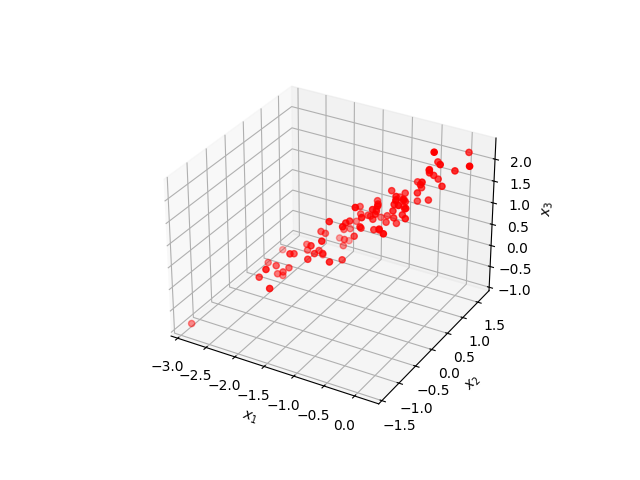

In [17]:
# Enable interactive rotation of graphs
%matplotlib widget

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = loadmat('PCA_Activity.mat')['X']
rows, cols = np.array(X.shape)
x, y, z = X

print('Rows of X = ',rows)
print('Cols of X = ',cols)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()


The graph seems pretty one dimensional, it all lies on a line, it doesnt not appear to be perfectly 0 mean though

##### Question 4-b

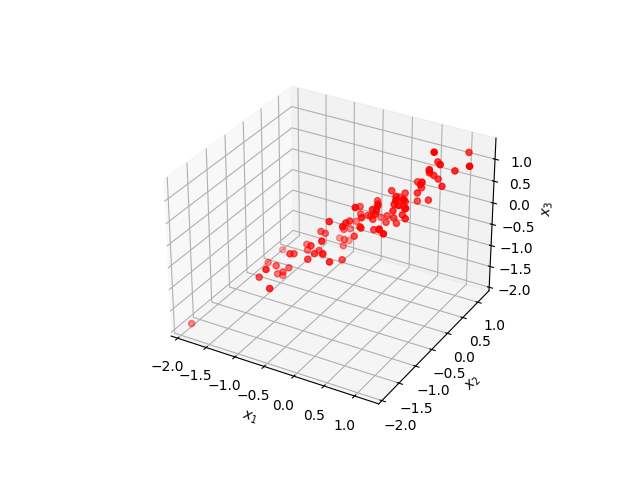

In [18]:
# Subtract mean
X_m = X - np.mean(X, 1).reshape((3,1))
x_m, y_m, z_m = X_m
# display zero mean scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [21]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = U[:, 0]

print(a)

[-0.58277194 -0.57701087 -0.57221964]


A one dimensional subspace is resonable to account for most of the error/variation

##### Question 2-c

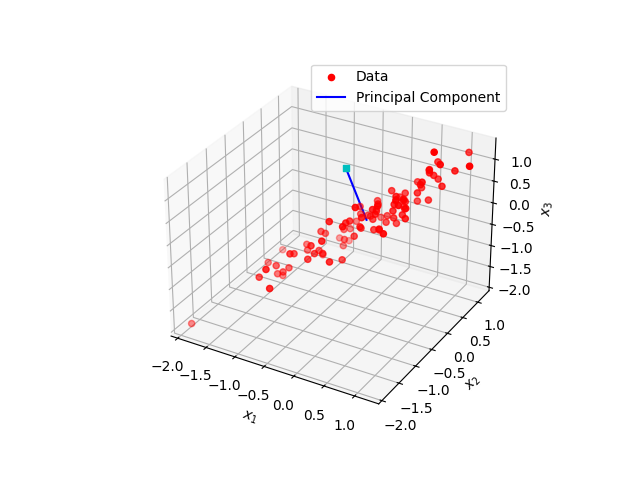

In [24]:
# display zero mean scatter plot and first principal component

U,s,VT = np.linalg.svd(X,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = U[:, 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o', label='Data')

ax.scatter(a[0],a[1],a[2], c='c', marker='s')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.plot([0,a[0]],[0,a[1]],[0,a[2]], c='b',label='Principal Component')

ax.legend()
plt.show()

When we dont remove the mean the PC direction is not good at all for aligning wit the dominant feature direction